In [4]:
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets.mnist import load_data
from numpy import reshape
import matplotlib.pyplot as plt
import os
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.preprocessing import image
from keras.models import *
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout, UpSampling2D
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [2]:
from support_function import *

In [ ]:
features, labels = create_dataset(20)

Extracting Data of Class: TALKING
['T13.webp', 'T14.jpg', 'T8.MOV', 'T9.MOV', 'T1.MOV', 'T2.MOV', 'T3.MOV', 'T10.MOV', 'T7.MOV', 'T6.MOV', 'T4.mov', 'T5.MOV', 'T12.mp4', 'T11.mp4']
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T13.webp
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T14.jpg
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T8.MOV
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T9.MOV
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T1.MOV
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T2.MOV
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T3.MOV
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T10.MOV
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T7.MOV
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T6.MOV
/Users/parthkalathia/Desktop/CNN_SCRATCH/FINALDATASET_V2/TALKING/T4.mov
/Users/parthkalathia/De

In [ ]:
print("Length of features : ", len(features))
print("Length of labels : ", len(labels))

In [ ]:
one_hot_encoded_labels = to_categorical(labels)

In [6]:
# seed_constant = 23
# np.random.seed(seed_constant)
tf.random.set_seed(seed_constant)
# features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.0, shuffle = True, random_state = seed_constant)

23
None
23


In [6]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(features, one_hot_encoded_labels)

## DEFINE THE MODELS BASED ON 3DCNN

In [7]:
def create_model():
    from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
    from keras.layers import Dropout, Input, BatchNormalization
    from sklearn.metrics import confusion_matrix, accuracy_score
    from plotly.offline import iplot, init_notebook_mode
    from keras.losses import categorical_crossentropy
    from tensorflow.keras.optimizers import Adadelta
    from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D
    import plotly.graph_objs as go
    from matplotlib.pyplot import cm
    from keras.models import Model
    import numpy as np
    import keras
    import h5py
  
    model = Sequential()
    sample_shape=(16,16,16,3)
    model.add(Conv3D(32, kernel_size=(7,7,3) ,activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape ,padding='same'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Conv3D(64, kernel_size=(7,7,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(5, activation='softmax'))
    model.summary()
    return model

model = create_model()
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 16, 16, 16, 32)    14144     
                                                                 
 max_pooling3d (MaxPooling3D  (None, 8, 8, 8, 32)      0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 8, 8, 64)       301120    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 4, 4, 64)      0         
 3D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1

2023-03-07 23:16:43.287131: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## COMPILE THE MODEL

In [8]:
#Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

In [9]:
# x_train = features_train.reshape(features_train.shape[0], 16, 16, 16, 3)
X_train = X_train.reshape(X_train.shape[0], 16, 16, 16, 3)

#total no of sample, height, width, no of frames, channel

In [12]:
model_training_history = model.fit(x = np.array(X_train), y = np.array(Y_train) , shuffle = True, epochs = 5 , batch_size= 10, validation_split=0.2, callbacks = [early_stopping_callback])



Epoch 1/5
160/160 [==============================] - 69s 421ms/step - loss: 0.8362 - accuracy: 0.7150 - val_loss: 0.3592 - val_accuracy: 0.9125
Epoch 2/5
160/160 [==============================] - 71s 447ms/step - loss: 0.1948 - accuracy: 0.9431 - val_loss: 0.1575 - val_accuracy: 0.9450
Epoch 3/5
160/160 [==============================] - 72s 452ms/step - loss: 0.0719 - accuracy: 0.9800 - val_loss: 0.2155 - val_accuracy: 0.9225
Epoch 4/5
160/160 [==============================] - 71s 444ms/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.0762 - val_accuracy: 0.9675
Epoch 5/5
160/160 [==============================] - 71s 441ms/step - loss: 0.0494 - accuracy: 0.9856 - val_loss: 0.0813 - val_accuracy: 0.9725


In [13]:
# Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
model_name = '/Users/parthkalathia/Desktop/CNN_SCRATCH/MODELS/ED1_3DCNN.h5'

# Saving your Model
model.save(model_name)

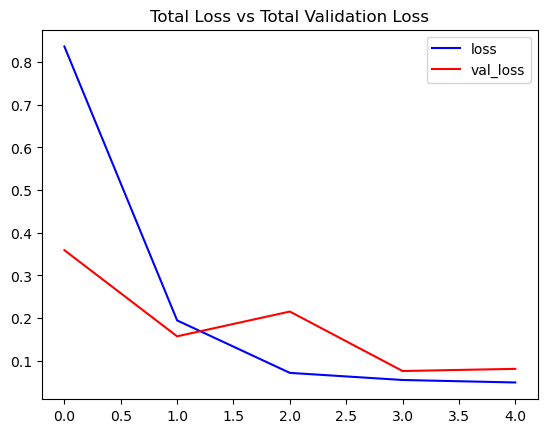

In [14]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss', model_training_history) 

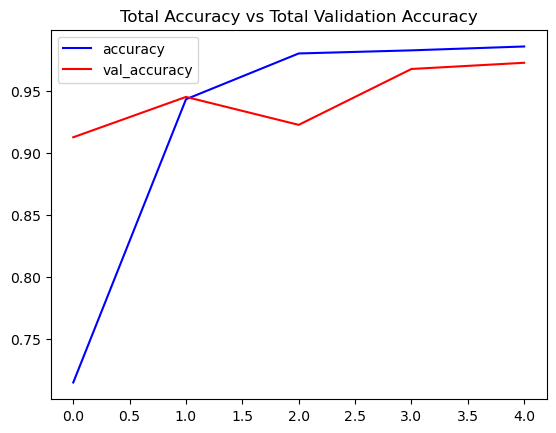

In [15]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy', model_training_history)